### Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.

You are free to choose any statistics library to analyze the data. In your answer, please include both the snippets of your code as well as the outputs.

Download the data `termination.csv` and `.ipynb` template from Canvas. Use the downloaded resources to answer the following questions:

#### a. (2 pts) Display a summary of the data (i.e. min, max, mean and quartiles for each variable). In the summary statistics, are there any meaningless quantities?

In [1]:
# Step 1: Load essential packages -- refer to recitation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [3]:
# Step 2: load data using read_csv function

In [4]:
df = pd.read_csv('termination.csv')
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [5]:
# step 3: Invoke appropriate function on the loaded data to get the summary statistics

In [6]:
df.describe(include='all', percentiles=[]).T

,count,unique,top,freq,mean,std,min,50%,max
EmployeeID,49653,NaN,NaN,NaN,4859.5,1826.57,1318,5031,8336
recorddate_key,49653,130,12/31/2013 0:00,5215,NaN,NaN,NaN,NaN,NaN
birthdate_key,49653,5342,1954-08-04,40,NaN,NaN,NaN,NaN,NaN
orighiredate_key,49653,4415,1992-08-09,50,NaN,NaN,NaN,NaN,NaN
terminationdate_key,49653,1055,1900-01-01,42450,NaN,NaN,NaN,NaN,NaN
age,49653,NaN,NaN,NaN,42.077,12.4273,19,42,65
length_of_service,49653,NaN,NaN,NaN,10.4346,6.32529,0,10,26
city_name,49653,40,Vancouver,11211,NaN,NaN,NaN,NaN,NaN
department_name,49653,21,Meats,10269,NaN,NaN,NaN,NaN,NaN
job_title,49653,47,Meat Cutter,9984,NaN,NaN,NaN,NaN,NaN


Student Response: The mean, std, min, 50%, and max for the primary key EmployeeID are meaningless since the ID is a unique identifier, not a measurable value. Additionally, the numerical summary statistics aren't useful for the nominal and ordinal values (i.e. mean city_name). 

#### b. (5 pts) The data include 10 years (2006 - 2015) of records for both active and terminated employees. Status Year field shows the year of data, and Status field shows the employment status – ACTIVE or TERMINATED in the corresponding status year. The company is interested in what proportion of the staff are leaving. Compute: 1) the percent of terminated employees out of all employees for each year; 2) average termination rate over the 10 years?

In [7]:
# Step 1: Create a pivot_table indexing STATUS_YEAR and apply to STATUS column

In [8]:
pvt = df.pivot_table(index='STATUS_YEAR', columns='STATUS', values='EmployeeID', aggfunc=np.count_nonzero)
pvt

STATUS,ACTIVE,TERMINATED
STATUS_YEAR,,
2006,4445,134
2007,4521,162
2008,4603,164
2009,4710,142
2010,4840,123
2011,4972,110
2012,5101,130
2013,5215,105
2014,4962,253


In [9]:
# Step 2: Based on the pivot_table, find total number of employees each year

In [10]:
# Chose to add totals to the pivot table to find total number of employees each year
pvt = df.pivot_table(index='STATUS_YEAR', columns='STATUS', values='EmployeeID', aggfunc=np.count_nonzero, margins=True, 
                     margins_name='TOTAL')
pvt

STATUS,ACTIVE,TERMINATED,TOTAL
STATUS_YEAR,,,
2006,4445,134,4579
2007,4521,162,4683
2008,4603,164,4767
2009,4710,142,4852
2010,4840,123,4963
2011,4972,110,5082
2012,5101,130,5231
2013,5215,105,5320
2014,4962,253,5215


In [11]:
# Step 3: Now compute the percentage

In [12]:
df_percentage = pd.DataFrame(pvt)
df_percentage['%LEAVING'] = df_percentage['TERMINATED']/df_percentage['TOTAL']
df_percentage

STATUS,ACTIVE,TERMINATED,TOTAL,%LEAVING
STATUS_YEAR,,,,
2006,4445,134,4579,0.029264
2007,4521,162,4683,0.034593
2008,4603,164,4767,0.034403
2009,4710,142,4852,0.029266
2010,4840,123,4963,0.024783
2011,4972,110,5082,0.021645
2012,5101,130,5231,0.024852
2013,5215,105,5320,0.019737
2014,4962,253,5215,0.048514


In [13]:
# Step 4: Invoke a function to compute average on the calculated percentage.

In [14]:
print('Average % leaving: ', np.round(df_percentage['%LEAVING'].mean()*100, 3))

Average % leaving:  2.997


#### c.(5 pts) In addition to the proportion of terminated employees, the company wants to know more about different types of termination. Give a stacked bar chart of terminates, where x-axis is status year, y-axis is number of terminated employees, and different colors in a bar show different termination reasons (‘termreason desc’ field in the data). What do you observe in this plot?

In [15]:
# Step 1: Filter dataframe for the relevant status for this question


In [16]:
df_terms = df[df['STATUS']=='TERMINATED']

In [17]:
# Step 2: Similar to part (b) create pivot table on column termreason_desc
# Step 3: Plot stacked bar chart using pandas plot bar function

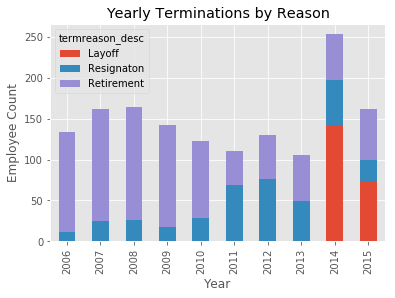

In [18]:
# note: I chose to create a stacked bar chart using groupby
df_term_reasons = df_terms.groupby(['STATUS_YEAR', 'termreason_desc'])['STATUS_YEAR'].count().unstack('termreason_desc')
df_term_reasons[['Layoff', 'Resignaton', 'Retirement']].plot(kind='bar', stacked=True)
plt.title('Yearly Terminations by Reason')
plt.xlabel('Year')
plt.ylabel('Employee Count')
plt.show()

Student Response: The most striking impression from this plot is that the company began laying off employees in 2014 and continued to do so through 2015. From 2006 to 2010, the ratio of retirements to resignations is heavily skewed toward retirements, which leads me to think the workforce had a high average age up until 2011, when the workforce started getting younger. Possibly a change in hiring practices?

#### d. (3 pts) Does Age affect termination? Draw (2) Box-plots of Age for active and terminated employees separately. What does the box-plot tell you?

In [19]:
# Step 1: Use pandas boxplot for this part

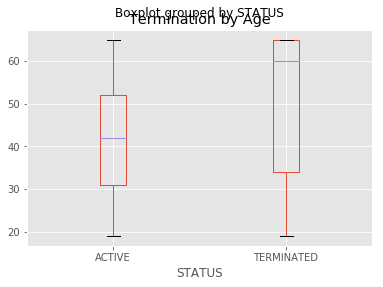

In [20]:
df.boxplot(column='age', by='STATUS')
plt.title('Termination by Age')
plt.show()

Student Response: This boxplot tells me that the average age of terminated employees is much higher than that of active employees. This is likely due, at least in part, to older employees retiring. However, given that the company went through two rounds of layoffs in 2014 and 2015, it would be interesting to look at the average age of the employees who were terminated because of a layoff in those two years - it might turn out that there is some age discrimination happening here as well.